# K-Means Clustering: Konsep Dasar

## Pengantar
K-Means Clustering adalah salah satu algoritma unsupervised learning yang paling populer dan sederhana untuk memahami. Algoritma ini bertujuan untuk mengelompokkan data ke dalam K kelompok (cluster) berdasarkan kemiripan karakteristik data.

## Apa yang akan kita pelajari?
1. Pengertian K-Means Clustering
2. Komponen Utama K-Means
3. Cara Kerja Algoritma
4. Kelebihan dan Kekurangan
5. Kapan Menggunakan K-Means
6. Visualisasi Konsep

Mari kita mulai dengan mempersiapkan library yang diperlukan!

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Set random seed untuk reproducibility
np.random.seed(42)

## 1. Pengertian K-Means Clustering

K-Means Clustering adalah algoritma yang mengelompokkan data berdasarkan kesamaan karakteristik. "K" dalam K-Means merujuk pada jumlah kelompok (cluster) yang ingin kita bentuk.

### Karakteristik Utama:
1. **Unsupervised Learning**: Tidak memerlukan label data untuk proses pembelajaran
2. **Partitional Clustering**: Setiap data hanya bisa menjadi anggota satu cluster
3. **Centroid-based**: Menggunakan pusat cluster (centroid) sebagai acuan
4. **Iterative**: Proses clustering dilakukan berulang hingga konvergen

### Komponen Utama:
1. **Centroid**: Titik pusat cluster
2. **Cluster**: Kelompok data yang memiliki karakteristik serupa
3. **Distance Metric**: Ukuran jarak antar data (biasanya Euclidean Distance)

## 2. Cara Kerja K-Means

Algoritma K-Means bekerja dalam beberapa tahap:

1. **Inisialisasi**:
   - Tentukan jumlah cluster (K)
   - Pilih K titik secara acak sebagai centroid awal

2. **Assignment**:
   - Hitung jarak setiap data ke semua centroid
   - Assign data ke cluster dengan centroid terdekat

3. **Update**:
   - Hitung ulang posisi centroid berdasarkan rata-rata data dalam cluster
   - Ulangi langkah 2-3 hingga tidak ada perubahan signifikan

Mari kita visualisasikan proses ini dengan contoh sederhana!

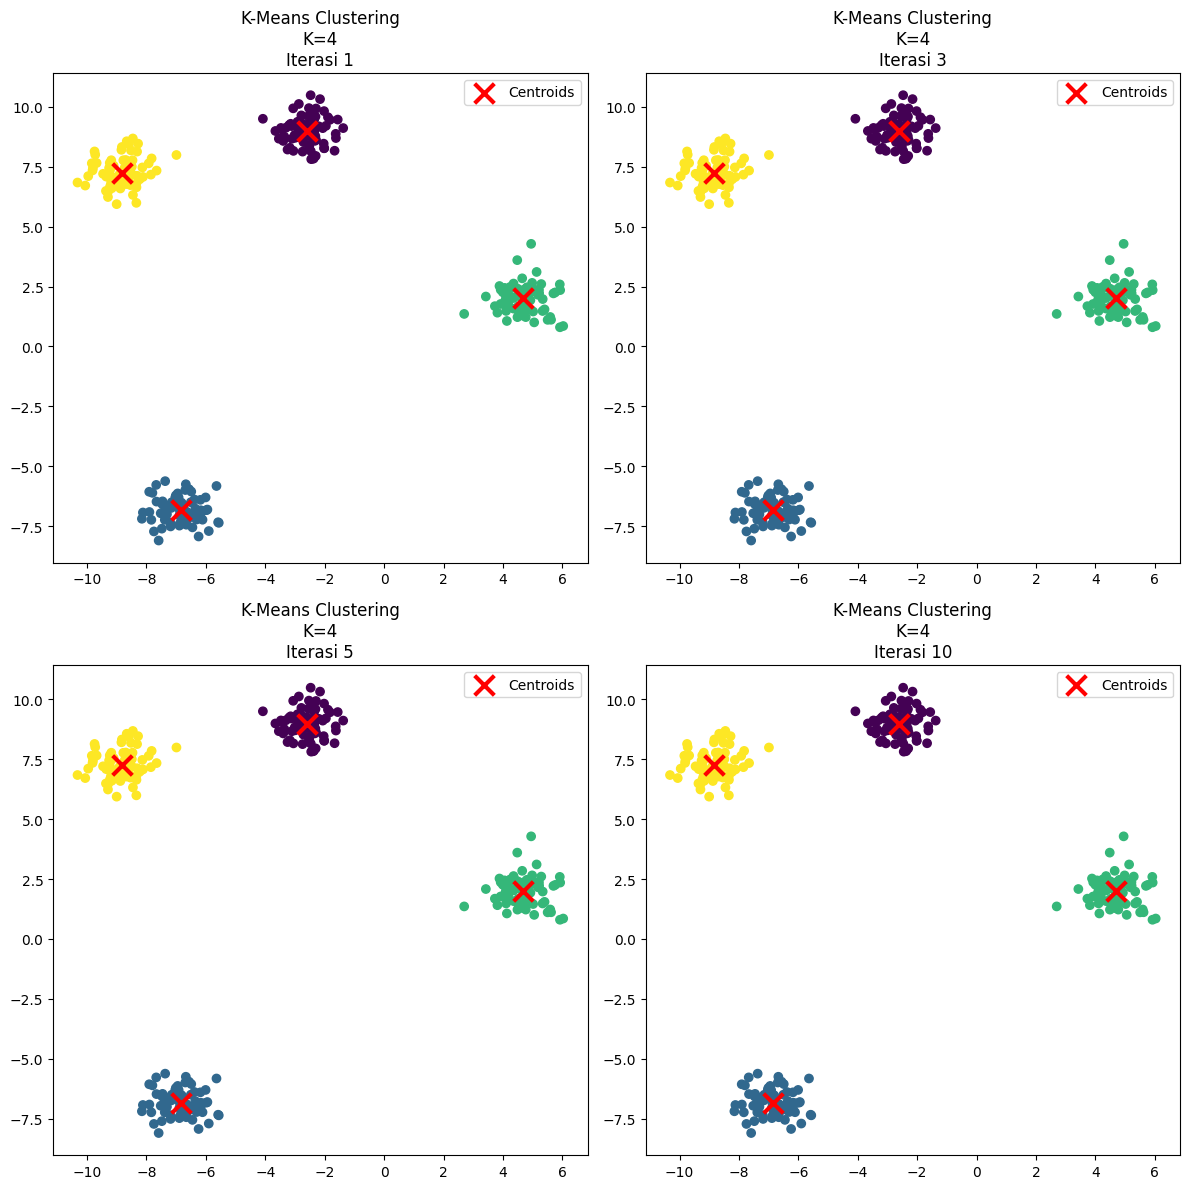

In [30]:
# Visualisasi proses iterasi untuk K=4
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
iterations = [1, 3, 5, 10]

for iter_num, ax in zip(iterations, axes.ravel()):
    kmeans = KMeans(n_clusters=4, random_state=42, max_iter=iter_num)
    kmeans.fit(X)
    plot_kmeans_steps(X, 4, ax, iter_num)

plt.tight_layout()
plt.show()

## 3. Pemilihan Nilai K yang Optimal

Salah satu tantangan dalam K-Means adalah menentukan jumlah cluster (K) yang optimal. Ada beberapa metode yang dapat digunakan:

1. **Elbow Method**: 
   - Plot WCSS (Within-Cluster Sum of Squares) vs nilai K
   - Pilih K di "siku" grafik
   
2. **Silhouette Analysis**:
   - Mengukur seberapa mirip objek dengan cluster-nya sendiri dibanding cluster lain
   - Nilai silhouette yang tinggi menunjukkan clustering yang baik

Mari kita implementasikan Elbow Method:

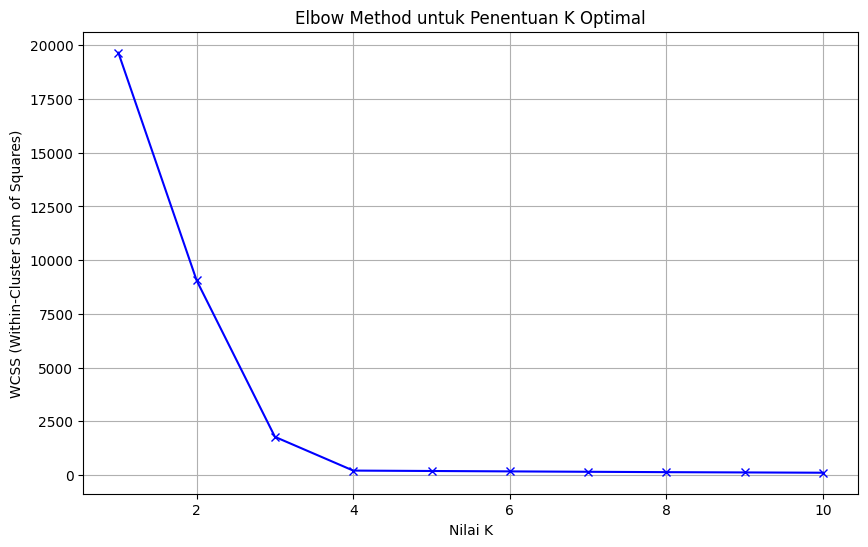

Berdasarkan grafik Elbow Method, kita dapat melihat bahwa titik siku berada di sekitar K=4,
yang menunjukkan bahwa 4 cluster mungkin adalah pilihan optimal untuk dataset ini.


In [31]:
# Implementasi Elbow Method
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Nilai K')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method untuk Penentuan K Optimal')
plt.grid(True)
plt.show()

print("Berdasarkan grafik Elbow Method, kita dapat melihat bahwa titik siku berada di sekitar K=4,")
print("yang menunjukkan bahwa 4 cluster mungkin adalah pilihan optimal untuk dataset ini.")

## 4. Kelebihan dan Kekurangan K-Means

### Kelebihan:
1. **Sederhana dan Mudah Diimplementasikan**
   - Algoritma yang straightforward
   - Mudah dipahami dan dijelaskan

2. **Efisien**
   - Kompleksitas waktu O(tkn), dimana:
     - t = jumlah iterasi
     - k = jumlah cluster
     - n = jumlah data

3. **Fleksibel**
   - Dapat bekerja dengan berbagai jenis data
   - Mudah dimodifikasi untuk kebutuhan spesifik

### Kekurangan:
1. **Sensitif terhadap Inisialisasi**
   - Hasil bisa berbeda-beda tergantung inisialisasi centroid
   - Bisa terjebak di local optima

2. **Perlu Menentukan K**
   - Jumlah cluster harus ditentukan di awal
   - Pemilihan K yang tidak tepat bisa menghasilkan clustering yang buruk

3. **Sensitif terhadap Outlier**
   - Outlier dapat mempengaruhi posisi centroid
   - Tidak cocok untuk data dengan noise tinggi

4. **Asumsi Cluster Berbentuk Bulat**
   - Menggunakan jarak Euclidean
   - Tidak optimal untuk cluster dengan bentuk non-spherical

## 5. Kapan Menggunakan K-Means?

K-Means cocok digunakan dalam situasi berikut:

1. **Segmentasi Pelanggan**
   - Mengelompokkan pelanggan berdasarkan perilaku pembelian
   - Identifikasi target market

2. **Analisis Dokumen**
   - Pengelompokan dokumen berdasarkan topik
   - Kategorisasi artikel

3. **Kompresi Gambar**
   - Mengurangi jumlah warna dalam gambar
   - Optimasi penyimpanan

4. **Anomaly Detection**
   - Identifikasi pola tidak normal
   - Deteksi fraud

## Tips Penggunaan K-Means:

1. **Preprocessing Data**
   - Standardisasi fitur numerik
   - Penanganan missing values
   - Penanganan outlier

2. **Pemilihan K**
   - Gunakan domain knowledge
   - Implementasikan Elbow Method
   - Validasi dengan Silhouette Analysis

3. **Evaluasi Hasil**
   - Periksa interpretabilitas cluster
   - Validasi dengan domain expert
   - Gunakan multiple random initializations

## 6. Contoh Kasus: Segmentasi Pelanggan Sederhana

Mari kita lihat contoh sederhana penggunaan K-Means untuk segmentasi pelanggan berdasarkan dua variabel:
1. Frekuensi pembelian
2. Total pengeluaran

Kita akan membuat data sintesis untuk simulasi ini.

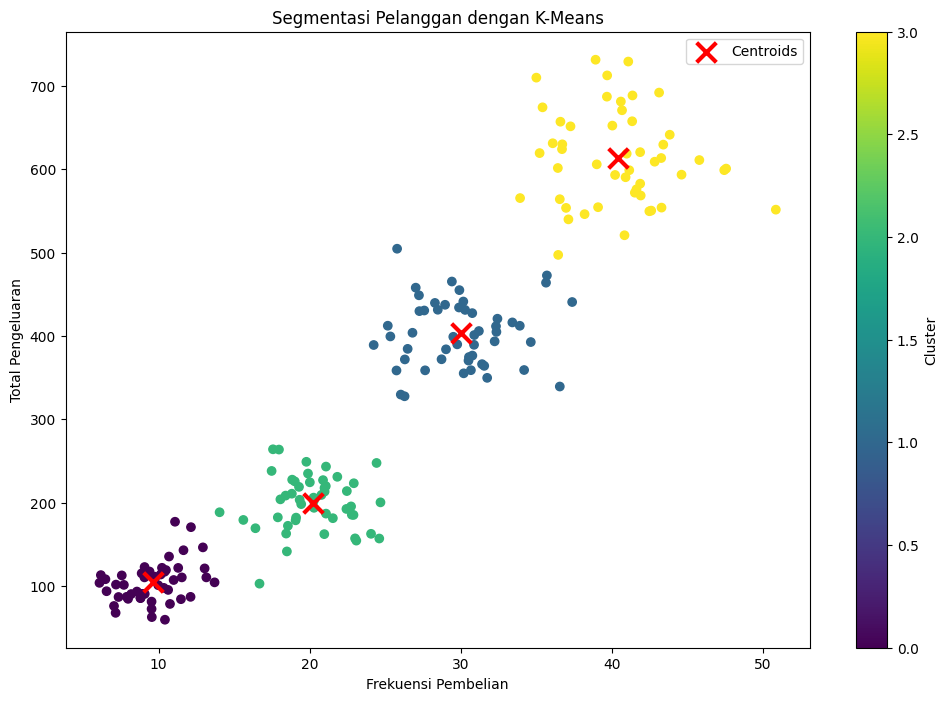


Cluster 0:
Jumlah pelanggan: 51
Rata-rata frekuensi: 9.6
Rata-rata pengeluaran: $104.34

Cluster 1:
Jumlah pelanggan: 51
Rata-rata frekuensi: 30.0
Rata-rata pengeluaran: $403.00

Cluster 2:
Jumlah pelanggan: 49
Rata-rata frekuensi: 20.2
Rata-rata pengeluaran: $199.95

Cluster 3:
Jumlah pelanggan: 49
Rata-rata frekuensi: 40.4
Rata-rata pengeluaran: $613.71


In [32]:
# Membuat data pelanggan sintesis
np.random.seed(42)
n_customers = 200

# Generate data
frequency = np.concatenate([
    np.random.normal(10, 2, n_customers//4),   # Low frequency
    np.random.normal(20, 3, n_customers//4),   # Medium frequency
    np.random.normal(30, 3, n_customers//4),   # High frequency
    np.random.normal(40, 4, n_customers//4)    # Very high frequency
])

spending = np.concatenate([
    np.random.normal(100, 20, n_customers//4),  # Low spending
    np.random.normal(200, 30, n_customers//4),  # Medium spending
    np.random.normal(400, 50, n_customers//4),  # High spending
    np.random.normal(600, 60, n_customers//4)   # Very high spending
])

# Combine data
customer_data = np.column_stack([frequency, spending])

# Standardisasi data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data)

# Aplikasikan K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(customer_data_scaled)

# Visualisasi hasil
plt.figure(figsize=(12, 8))
scatter = plt.scatter(frequency, spending, c=clusters, cmap='viridis')
plt.xlabel('Frekuensi Pembelian')
plt.ylabel('Total Pengeluaran')
plt.title('Segmentasi Pelanggan dengan K-Means')
plt.colorbar(scatter, label='Cluster')

# Plot centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.legend()
plt.show()

# Analisis cluster
for i in range(4):
    cluster_data = customer_data[clusters == i]
    print(f"\nCluster {i}:")
    print(f"Jumlah pelanggan: {len(cluster_data)}")
    print(f"Rata-rata frekuensi: {cluster_data[:, 0].mean():.1f}")
    print(f"Rata-rata pengeluaran: ${cluster_data[:, 1].mean():.2f}")

## Interpretasi Hasil Segmentasi

Berdasarkan hasil clustering, kita dapat mengidentifikasi 4 segmen pelanggan:

1. **Cluster 0 - Low Value Customers**
   - Frekuensi pembelian rendah (≈10 kali)
   - Pengeluaran rendah (≈$104)
   - Strategi: Tingkatkan engagement dan penawaran produk entry-level

2. **Cluster 2 - Medium Value Customers**
   - Frekuensi pembelian sedang (≈20 kali)
   - Pengeluaran sedang (≈$200)
   - Strategi: Dorong untuk meningkatkan frekuensi pembelian

3. **Cluster 1 - High Value Customers**
   - Frekuensi pembelian tinggi (≈30 kali)
   - Pengeluaran tinggi (≈$403)
   - Strategi: Pertahankan loyalitas dengan program rewards

4. **Cluster 3 - Premium Customers**
   - Frekuensi pembelian sangat tinggi (≈40 kali)
   - Pengeluaran sangat tinggi (≈$614)
   - Strategi: Berikan layanan premium dan penawaran eksklusif

### Implikasi Bisnis:

1. **Personalisasi Marketing**
   - Setiap cluster dapat menerima kampanye marketing yang berbeda
   - Penawaran produk dapat disesuaikan dengan karakteristik cluster

2. **Alokasi Sumber Daya**
   - Fokus lebih besar pada cluster dengan nilai tinggi
   - Strategi berbeda untuk meningkatkan nilai setiap cluster

3. **Pengembangan Produk**
   - Dapat merancang produk yang sesuai dengan kebutuhan setiap cluster
   - Identifikasi peluang cross-selling dan up-selling

## Kesimpulan

K-Means Clustering adalah algoritma yang powerful untuk:
1. Menemukan pola dalam data
2. Segmentasi data menjadi kelompok-kelompok yang bermakna
3. Mendukung pengambilan keputusan bisnis

Namun, perlu diingat bahwa:
1. Pemilihan jumlah cluster (K) sangat penting
2. Interpretasi hasil harus melibatkan domain knowledge
3. Hasil clustering perlu divalidasi secara berkala